In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('../thread_count_constant_new.csv')

data = data.transpose()
data.columns = data.loc['runName']
data = data.drop(list(filter(lambda x: not x.isdigit(), data.index)), axis=0)

sequence = ['singleThread_constant','twoThreads_constant','threeThreads_constant', 'fourThreads_constant','fiveThreads_constant', 'sixThreads_constant','sevenThreads_constant','eightThreads_constant']
data = data.reindex(columns=sequence)

dataForBoxplot = data.copy()
dataForScatter = data.copy()

data.loc['mean'] = data.mean(axis=0).round().astype(int)


data

runName,singleThread_constant,twoThreads_constant,threeThreads_constant,fourThreads_constant,fiveThreads_constant,sixThreads_constant,sevenThreads_constant,eightThreads_constant
0,29325,22827,19675,17612,17333,19725,20236,6324
1,28534,23129,19178,19560,22153,18219,19874,12301
2,26950,22583,20255,19772,19065,20019,18987,17338
3,27578,23202,20178,17984,21206,19644,19869,18296
4,28592,22784,19505,17411,19719,19850,19755,20340
5,28463,23070,19545,19582,21982,21352,19666,17756
6,27202,23196,19772,20811,21343,18286,20479,18220
7,27742,22886,19548,19514,21699,17431,20848,19891
8,27118,22912,19512,18710,18817,18758,19743,18393
9,27188,23605,19596,19025,19498,19904,21493,19786


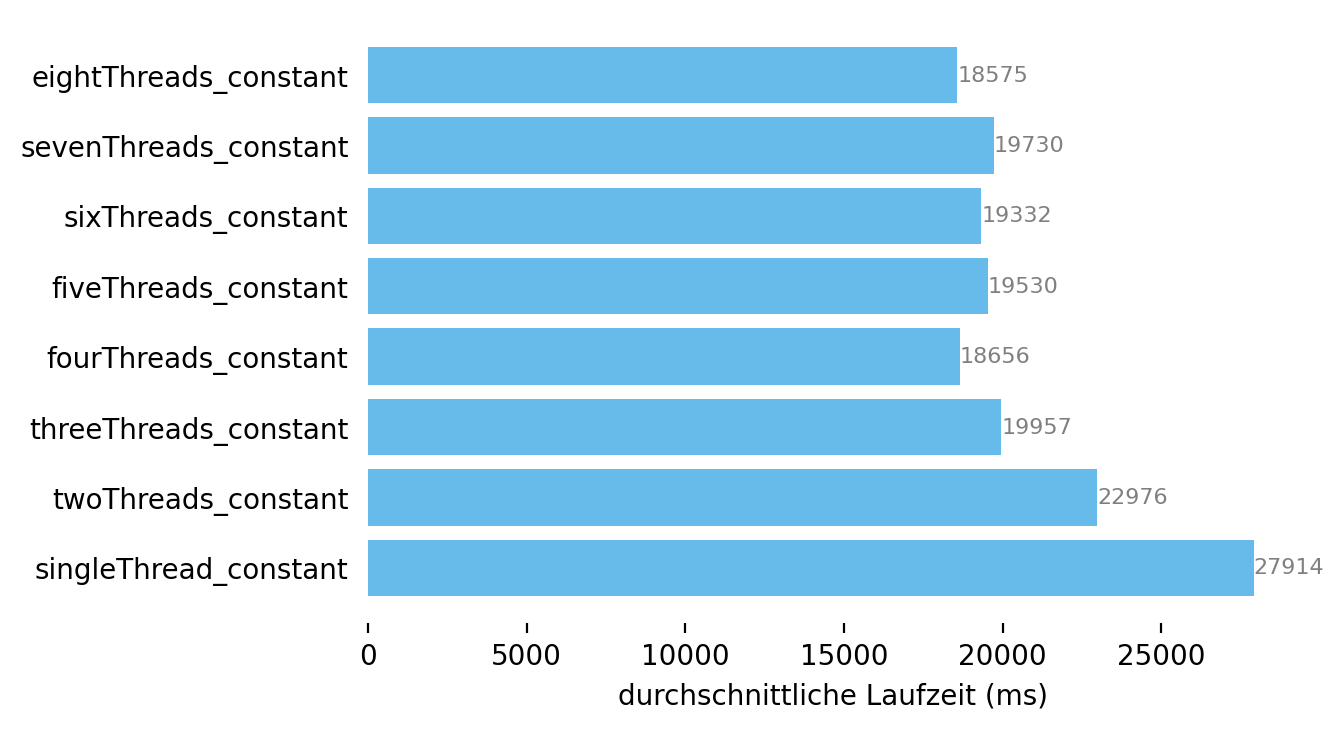

In [4]:
from matplotlib.text import Text
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.barh(data.columns, data.loc['mean'], color='#56B4E9', alpha=0.9)
ax.set(xlabel='durchschnittliche Laufzeit (ms)')
plt.tick_params(left = False)


# Die Ausführungszeit an den Balken angezeigen
for i, rect in enumerate(bar_plot):
    text: Text = plt.text(i, data.columns[i], data.loc['mean'][i], verticalalignment='center', horizontalalignment='left',alpha=0.5, fontsize=8)
    text.set_x(rect.get_width())
    

for spine in ax.spines.values():
    spine.set_visible(False)

In [5]:
dataNew = {'threads': [1, 2, 3, 4, 5, 6, 7, 8], 'laufzeit': [data['singleThread_constant'].mean().round().astype(int), data['twoThreads_constant'].mean().round().astype(int), data['threeThreads_constant'].mean().round().astype(int), data['fourThreads_constant'].mean().round().astype(int), data['fiveThreads_constant'].mean().round().astype(int), data['sixThreads_constant'].mean().round().astype(int), data['sevenThreads_constant'].mean().round().astype(int), data['eightThreads_constant'].mean().round().astype(int)]}

df = pd.DataFrame(dataNew,columns=['threads','laufzeit'])
#Korrelationsmatrix erstellen
df.corr()
dataNew

{'threads': [1, 2, 3, 4, 5, 6, 7, 8],
 'laufzeit': [27914, 22976, 19957, 18656, 19530, 19332, 19730, 18575]}

<AxesSubplot:xlabel='runName'>

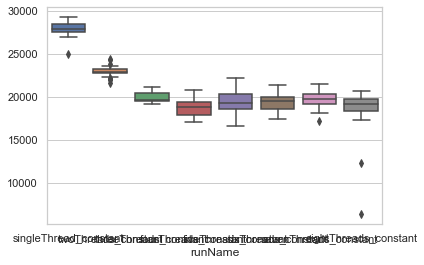

In [6]:
sns.set_theme(style="whitegrid")
#sns.set(rc={'figure.figsize':(25,10)})
sns.boxplot(data=dataForBoxplot)

#Boxgröße zeigt die Streeung an, drei vier und eight die geringste Streuung

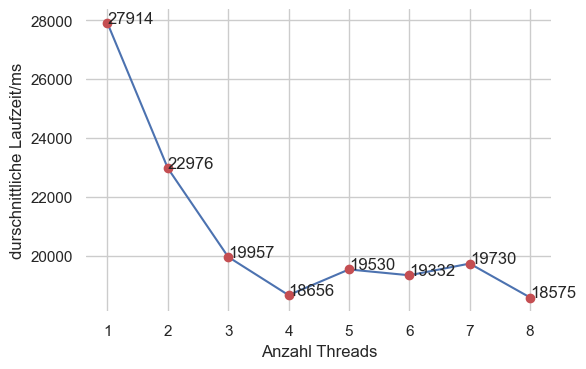

In [7]:
x, y = dataNew['threads'], dataNew['laufzeit']

figScatter, ax = plt.subplots(figsize=(6,4), dpi=100)
ax.scatter(x, y, color='r', zorder=2)
plt.plot(x, y, zorder=1)
plt.xlabel("Anzahl Threads")
plt.ylabel("durschnittliche Laufzeit/ms")
for i, txt in enumerate(dataNew['laufzeit']):
    ax.annotate(txt, (dataNew['threads'][i], dataNew['laufzeit'][i]))

for spine in ax.spines.values():
    spine.set_visible(False)

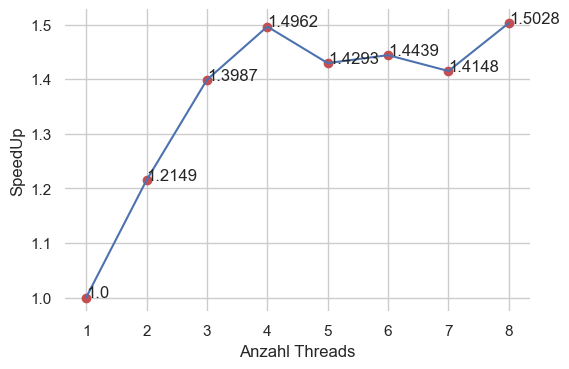

In [8]:
#Speedup
speedup = {}
for i in range(0,8):
    speedup[i+1] = round((dataNew['laufzeit'][0] / dataNew['laufzeit'][i]),4)

spArray = np.array(list(speedup.values()))
x, y = dataNew['threads'], spArray

figScatter2, ax = plt.subplots(figsize=(6,4), dpi=100)
ax.scatter(x, y, color='r')
plt.plot(x, y)
plt.xlabel("Anzahl Threads")
plt.ylabel("SpeedUp")

for i, txt in enumerate(spArray):
    ax.annotate(txt, (dataNew['threads'][i], spArray[i]))

for spine in ax.spines.values():
    spine.set_visible(False)